In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix




In [2]:
data=pd.read_csv("online_shoppers_intention.csv")

In [3]:
df=pd.DataFrame(data)

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Length: 12330, dtype: bool

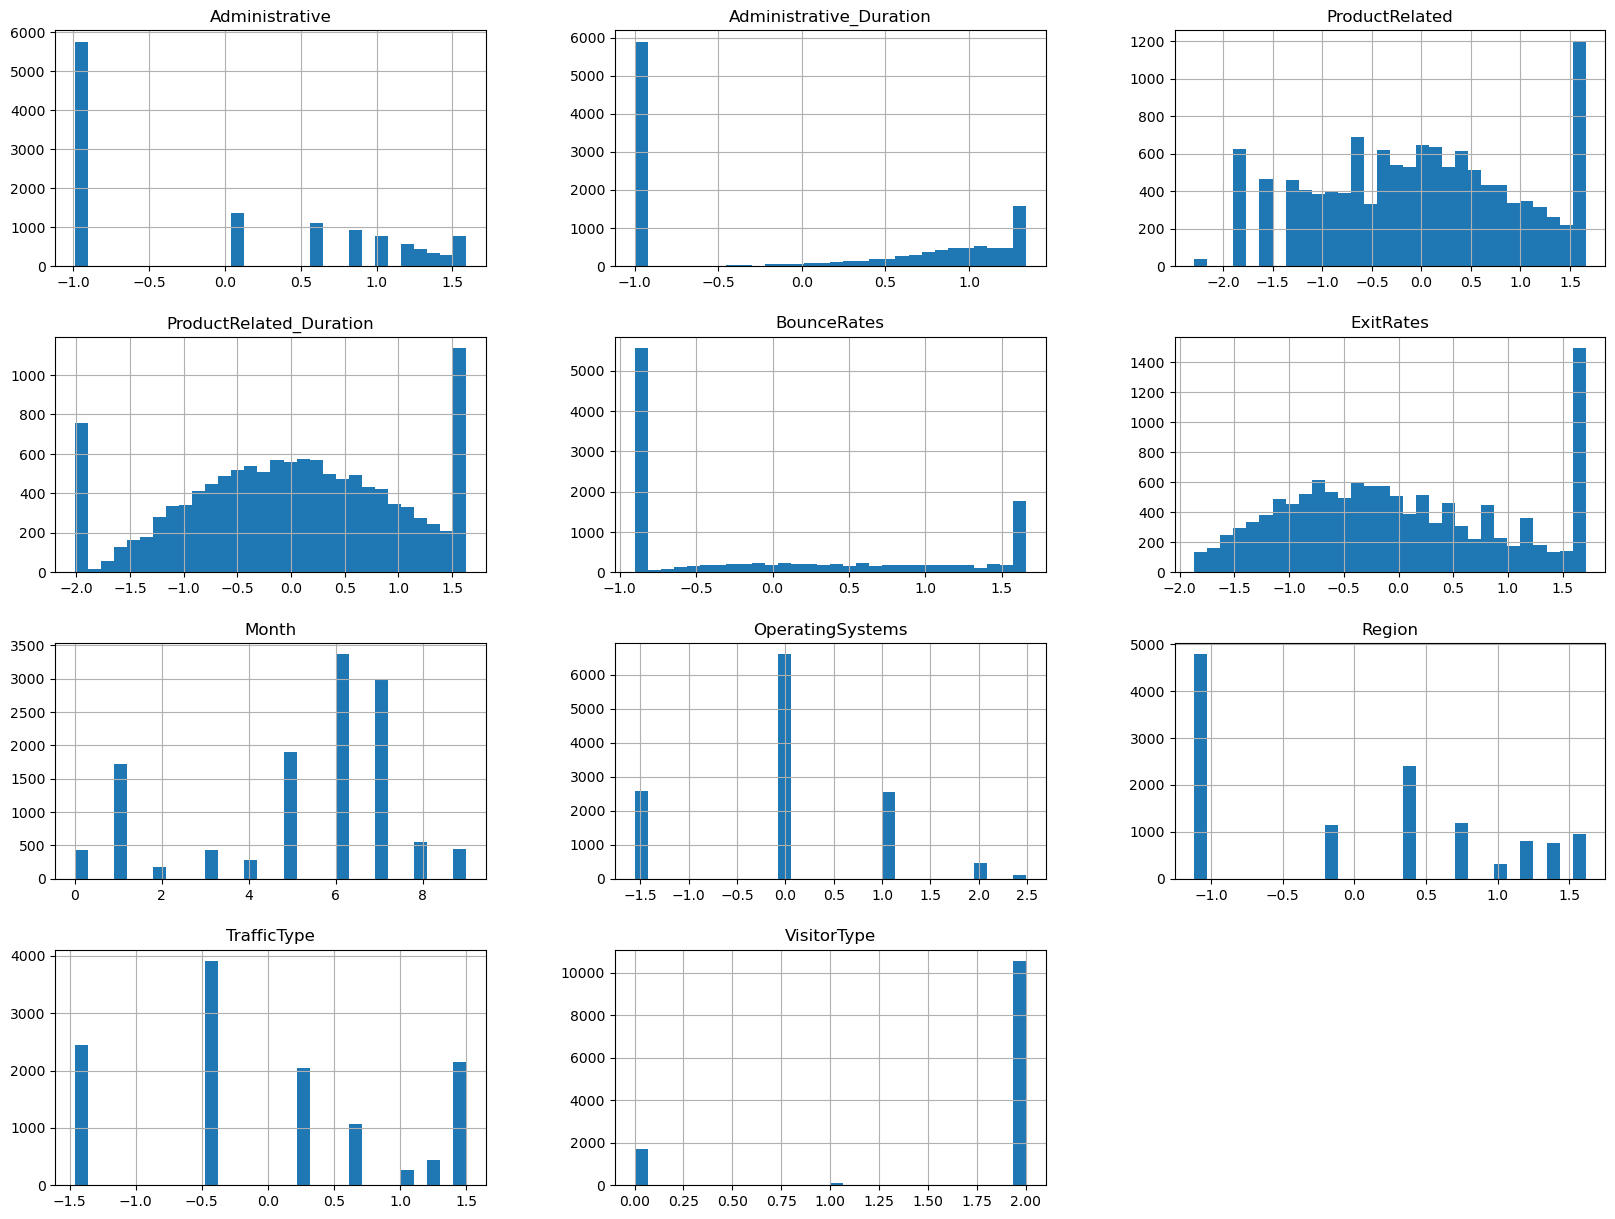

In [105]:
df.hist(bins=30, figsize=(20, 15))
plt.title('Numerical_distribution')
plt.show()

In [10]:
df = df.drop(['Informational', 'Informational_Duration', 'PageValues','SpecialDay','Browser'], axis=1)

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# Get the list of numeric columns excluding 'Revenue'
numeric_cols = [i for i in df.describe(include=['float64', 'int64', 'bool']).columns if i != 'Revenue']

# Apply SMOTE
x_smote, y_smote = smote.fit_resample(df[numeric_cols], df['Revenue'])


In [12]:
#finding & 

In [13]:
num_columns=df.select_dtypes(include='number')

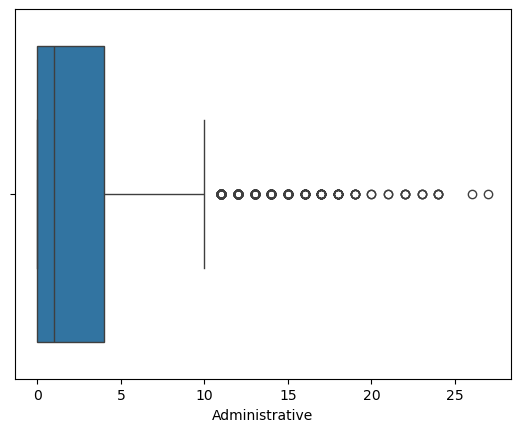

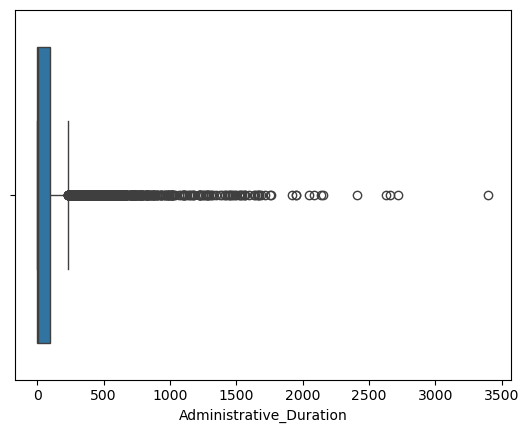

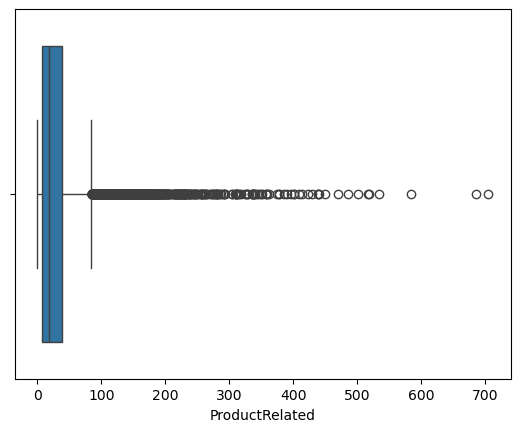

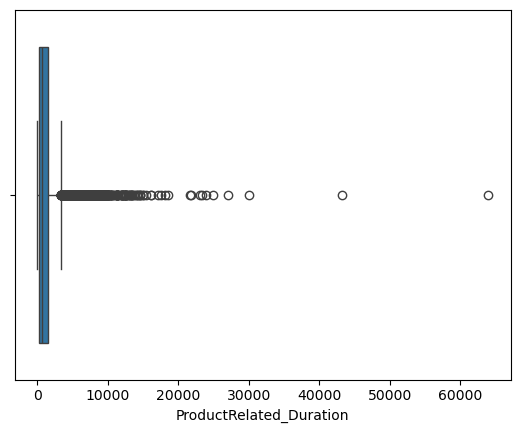

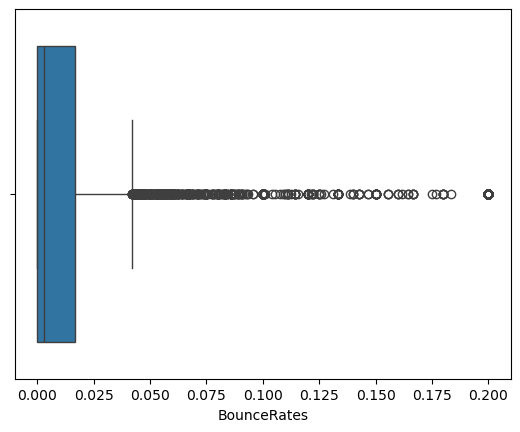

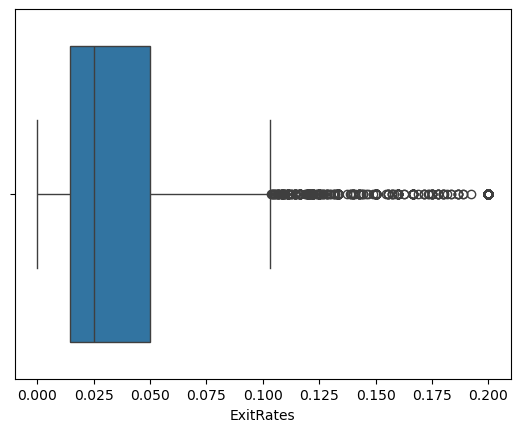

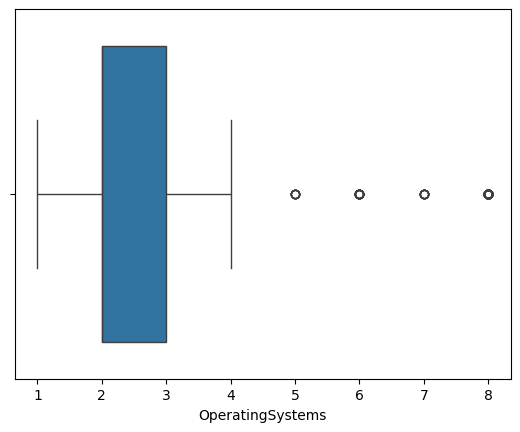

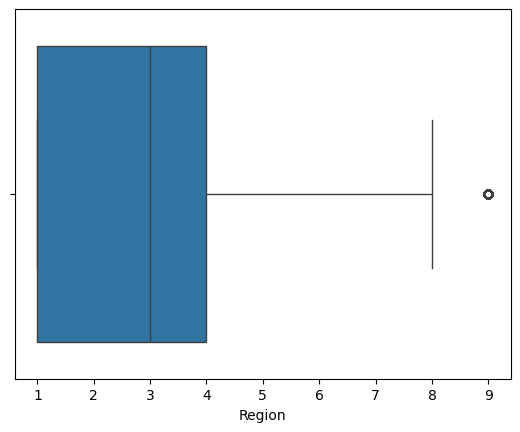

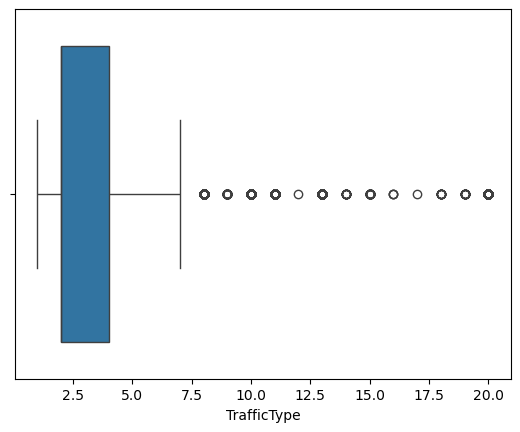

In [14]:
for i in num_columns.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [15]:
#iqr

def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping the outliers
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df
    

In [16]:
df1= outliers(df)

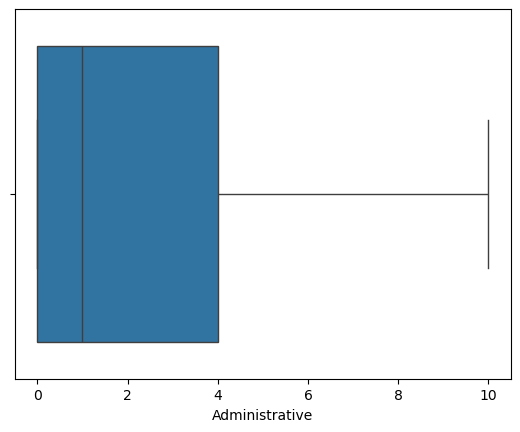

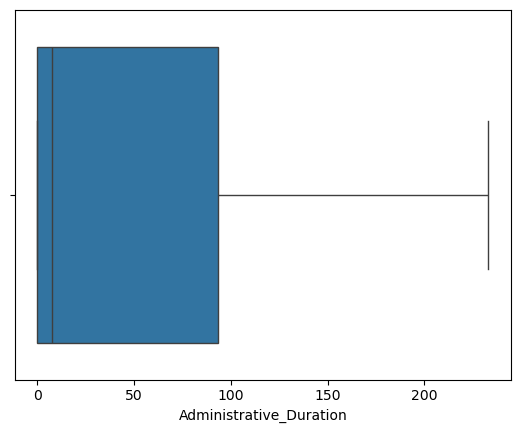

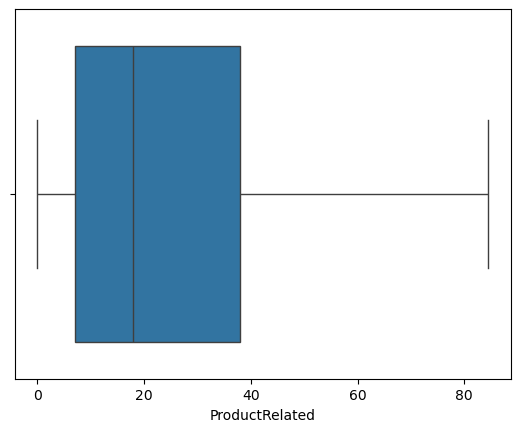

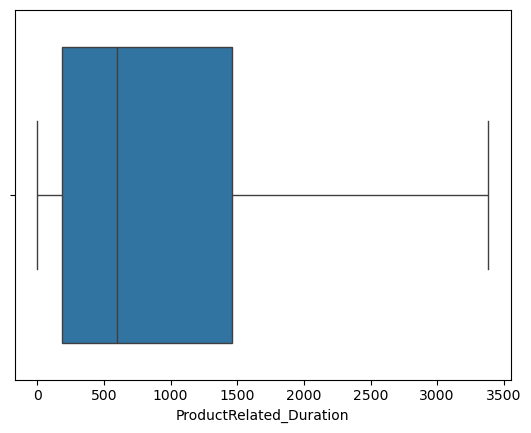

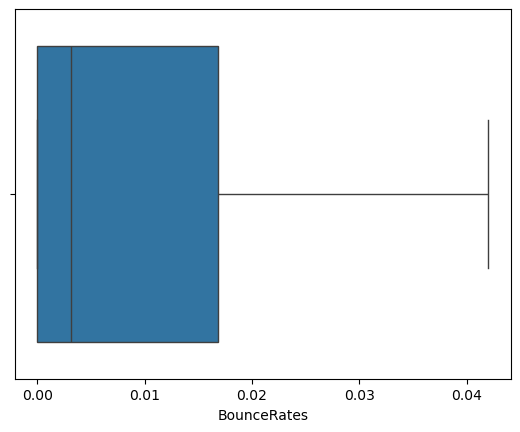

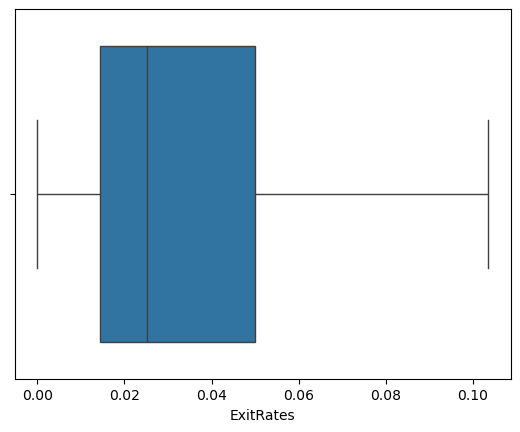

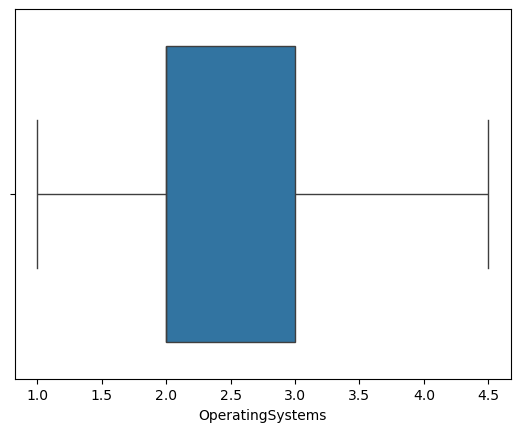

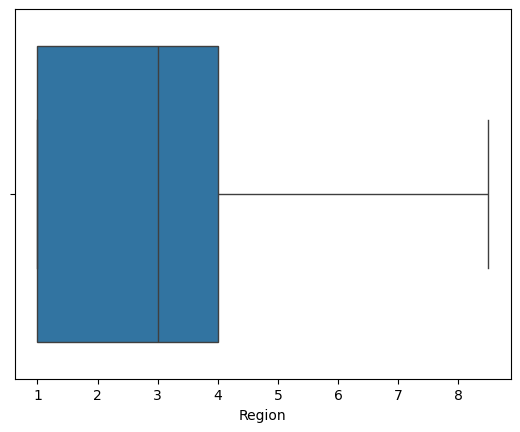

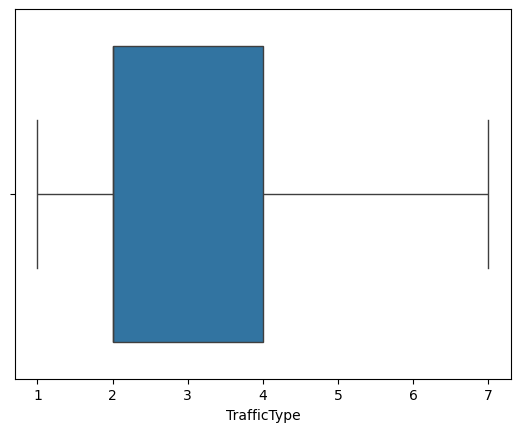

In [17]:
for i in num_columns.columns:
    sns.boxplot(data=df1,x=i)
    plt.show()

In [18]:
#skew

In [19]:
numerical_features = df1.select_dtypes(include=['float64','int64']).columns

In [20]:
df1[numerical_features].skew()

Administrative             1.317659
Administrative_Duration    1.233337
ProductRelated             1.135023
ProductRelated_Duration    1.159401
BounceRates                1.197563
ExitRates                  1.125980
OperatingSystems           0.547254
Region                     0.922648
TrafficType                0.841436
dtype: float64

In [21]:
pt=PowerTransformer(method='yeo-johnson')

In [22]:
df1[numerical_features] = pt.fit_transform(df1[numerical_features])

In [23]:
df1[numerical_features].skew()

Administrative             0.233920
Administrative_Duration    0.114054
ProductRelated            -0.046843
ProductRelated_Duration   -0.172587
BounceRates                0.562123
ExitRates                  0.267372
OperatingSystems          -0.005463
Region                     0.126243
TrafficType                0.068843
dtype: float64

In [24]:
#encodig
label_encoders = {}
categorical_columns = ["Month", "VisitorType"]

for col in categorical_columns:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   ProductRelated           12330 non-null  float64
 3   ProductRelated_Duration  12330 non-null  float64
 4   BounceRates              12330 non-null  float64
 5   ExitRates                12330 non-null  float64
 6   Month                    12330 non-null  int32  
 7   OperatingSystems         12330 non-null  float64
 8   Region                   12330 non-null  float64
 9   TrafficType              12330 non-null  float64
 10  VisitorType              12330 non-null  int32  
 11  Weekend                  12330 non-null  bool   
 12  Revenue                  12330 non-null  bool   
dtypes: bool(2), float64(9), int32(2)
memory usage: 987.5 KB


In [26]:
#correlation

In [27]:
cr=df.corr()

In [28]:
cr

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Month,OperatingSystems,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.955899,0.453614,0.420789,-0.211897,-0.448687,0.051644,-0.006366,0.010966,0.003876,-0.107960,0.040673,0.167665
Administrative_Duration,0.955899,1.000000,0.428381,0.411057,-0.223614,-0.461721,0.048042,-0.012914,0.018990,0.001874,-0.135033,0.043153,0.167293
ProductRelated,0.453614,0.428381,1.000000,0.890572,-0.160151,-0.550619,0.070395,0.032702,-0.020681,-0.058622,0.116276,0.033688,0.197400
ProductRelated_Duration,0.420789,0.411057,0.890572,1.000000,-0.202200,-0.527274,0.063217,0.034187,-0.009270,-0.057006,0.100464,0.029019,0.213886
BounceRates,-0.211897,-0.223614,-0.160151,-0.202200,1.000000,0.652873,-0.000362,0.029728,-0.009409,0.002873,0.275323,-0.034995,-0.167281
ExitRates,-0.448687,-0.461721,-0.550619,-0.527274,0.652873,1.000000,-0.040102,0.010736,-0.005994,0.003262,0.270079,-0.069534,-0.254543
Month,0.051644,0.048042,0.070395,0.063217,-0.000362,-0.040102,1.000000,-0.002846,-0.029646,0.076242,0.026481,0.029132,0.080150
OperatingSystems,-0.006366,-0.012914,0.032702,0.034187,0.029728,0.010736,-0.002846,1.000000,0.029914,0.064251,0.030320,-0.004528,-0.018490
Region,0.010966,0.018990,-0.020681,-0.009270,-0.009409,-0.005994,-0.029646,0.029914,1.000000,-0.007210,-0.021932,0.007038,-0.015279
TrafficType,0.003876,0.001874,-0.058622,-0.057006,0.002873,0.003262,0.076242,0.064251,-0.007210,1.000000,-0.077643,0.016940,0.012431


Text(0.5, 1.0, 'correlation')

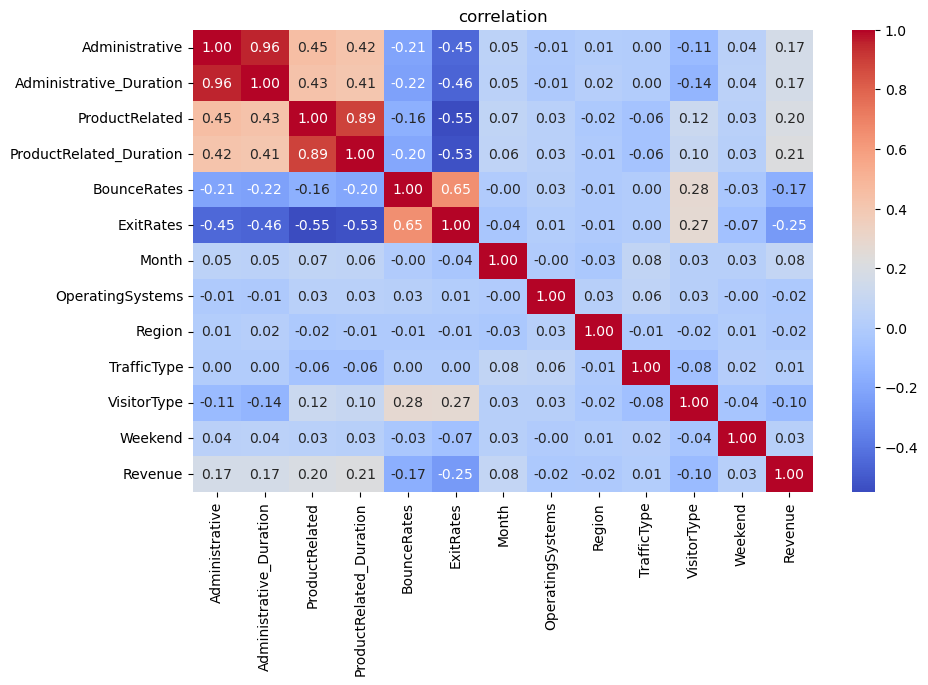

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(cr,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('correlation')

In [30]:
#future selection

In [63]:
X=df1
y=df['Revenue']


In [65]:
sk=SelectKBest(score_func=f_classif, k=10)
x_new=sk.fit_transform(X,y)

D:\anaconda 3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [67]:
selected_features = X.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': sk.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['Administrative', 'Administrative_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'Month',
       'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

Feature Scores:
                    Feature       Score
12                  Revenue         inf
5                 ExitRates  854.093287
3   ProductRelated_Duration  591.011460
2            ProductRelated  499.858550
0            Administrative  356.583744
1   Administrative_Duration  354.959116
4               BounceRates  354.906852
10              VisitorType  136.706379
6                     Month   79.708329
11                  Weekend   10.589207
7          OperatingSystems    4.216336
8                    Region    2.878477
9               TrafficType    1.905297


In [69]:
#standerdization

In [73]:
scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)

In [75]:
#spliting

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [91]:
X_train.shape

(9864, 13)

In [93]:
X_test.shape

(2466, 13)

In [95]:
y_test.shape

(2466,)

In [97]:
y_train.shape

(9864,)